In [147]:
import os
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pycatch22
from statsmodels.distributions.empirical_distribution import ECDF

### First we load the EEG data:

In [31]:
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
from scipy.ndimage import uniform_filter1d, sobel, prewitt, fourier_gaussian, fourier_shift
N = 100
runs = 1  # use only eye open data (left vs right)
# Get data and locate in to given path
allfiles = [eegbci.load_data(subject, runs, '../datasets/') for subject in range(N+1)[1:]]
# Read raw data files where each file contains a run
allraws = [[read_raw_edf(f, preload=True) for f in files] for files in allfiles]
# Combine all loaded runs
X_ = [np.array(concatenate_raws(raws).get_data()) for raws in allraws]

Extracting EDF parameters from /home/brendan/OneDrive/Masters/BrainHack2022/datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /home/brendan/OneDrive/Masters/BrainHack2022/datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S002/S002R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /home/brendan/OneDrive/Masters/BrainHack2022/datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S003/S003R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /home/brendan/OneDrive/Masters/BrainHack2022/datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S004/S004R01.edf...
EDF file detected


### Calculate ranges of dimensionalities and autocorrelation timescales:

In [69]:
def extractglobal(X):
    pca = PCA()
    pca.fit(X)
    x = pca.components_[0]
    v = pca.explained_variance_ratio_[0]
    return x, v

### Then we extract a global signal for a single subject:

In [161]:
xs, pc = zip(*[extractglobal(X) for X in X_])

In [162]:
rc = [pycatch22.CO_f1ecac(list(x)) for x in xs]

Text(0.5, 1.0, 'Explained variances over subjects')

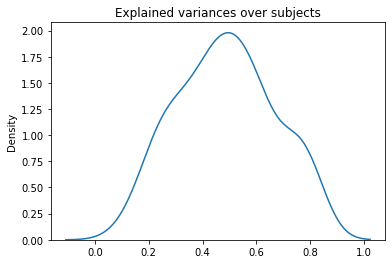

In [114]:
sns.kdeplot(pc)
plt.title('Explained variances over subjects')
# pca = PCA()
# pca.fit(X_[np.argmin(vs)])
# vs_ = pca.explained_variance_ratio_
# sns.lineplot(range(len(vs_)), vs_)

76

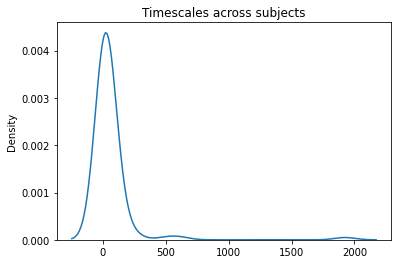

In [116]:
sns.kdeplot(rc)
plt.title('Timescales across subjects')

/home/brendan/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'PC = 0.56')

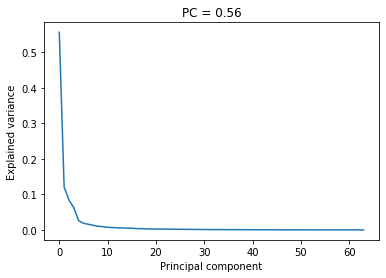

In [163]:
X = X_[0]
pca = PCA()
pca.fit(X)
v = pca.explained_variance_ratio_
x = pca.components_[0]
sns.lineplot(range(len(v)), v)
plt.xlabel('Principal component')
plt.ylabel('Explained variance')
plt.title('PC = {:.2f}'.format(v[0]))

/home/brendan/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.00010178456842078119

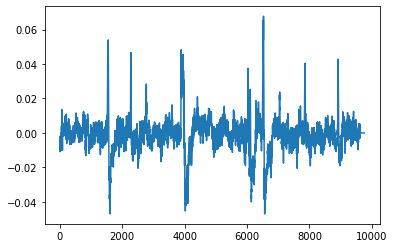

In [68]:
sns.lineplot(range(len(pca.components_[0])), pca.components_[0])

In [164]:
# Convert metrics to scores for a single subject using the cdf
pc = ECDF(pc)(v[0])
rc = ECDF(rc)(pycatch22.CO_f1ecac(list(x)))

0.72